In [1]:
import simulation as sim
import numpy as np

In [2]:
# definition des elements d'un shot-noise
intensity =1

def h(x):
    return 25 * x ** 2 * np.exp(2 - 10 * x) * (x >= 0)

def mixed_gaussian(n):
    U = np.random.rand(n) >= 0.5
    Y = [2 + .1 * np.random.randn() if u else np.pi + .2 * np.random.randn() for u in U]
    return Y

In [3]:
sn = sim.ShotNoise(impulse_response=h, intensity=intensity)
sn.impulse_response = h
sn.intensity = .2
sn.marks_density = mixed_gaussian

In [4]:
sn.simulate(50000, 0.01);

# Slicing a ShotNoise

In [5]:
sub_sn = sn[150:2000]

Populating the interactive namespace from numpy and matplotlib


<Container object of 3 artists>

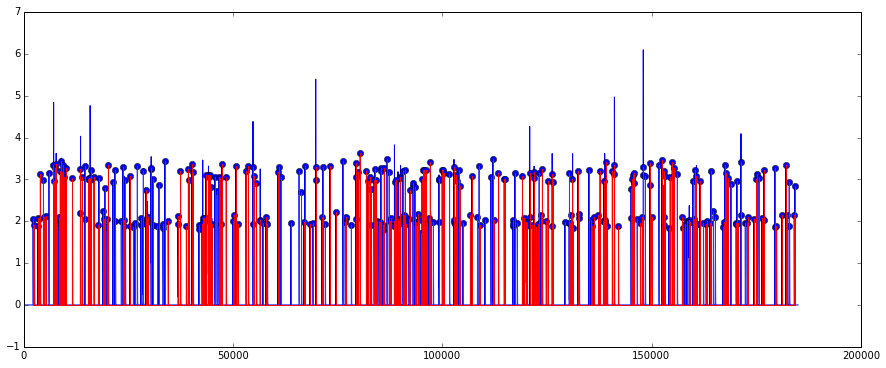

In [6]:
%pylab inline
plt.figure(figsize=(15,6))
plot(sub_sn.signal)
stem(sub_sn.times, sub_sn.marks, 'r')

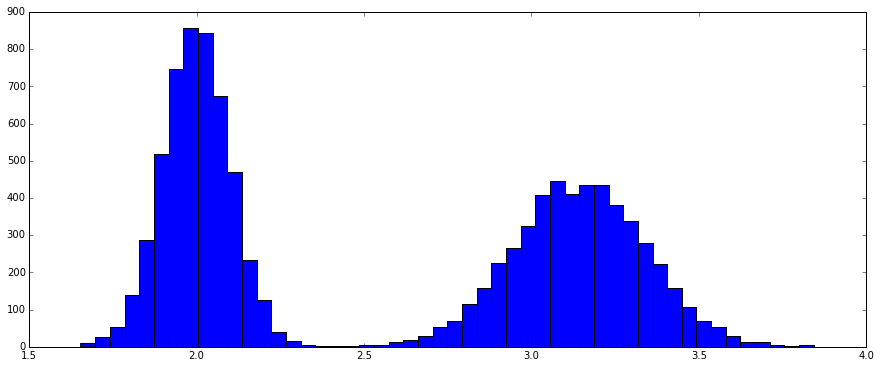

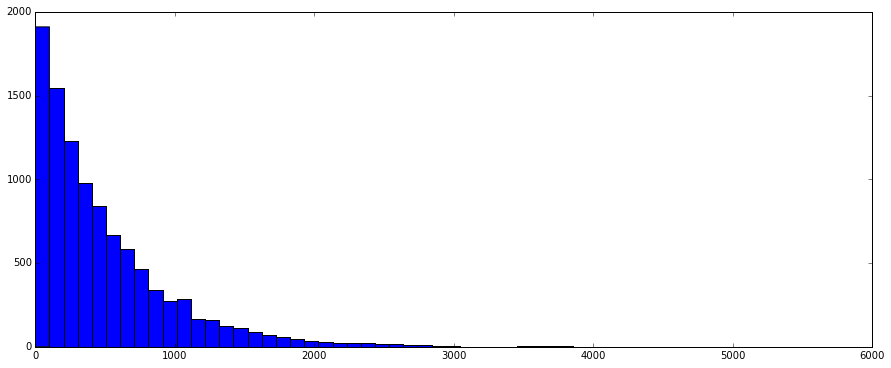

In [7]:
plt.figure(figsize=(15, 6))
hist(sn.marks, bins=50);
plt.figure(figsize=(15, 6))
hist(np.diff(sn.times), bins=50);

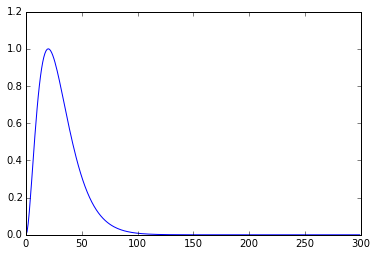

In [8]:
plot(sn.eval_kernel(0.01, 300))